In [2]:
import osmnx as ox
import itertools, heapq, random
from tqdm import tqdm
from utilities import *
import networkx as nx
import matplotlib.pyplot as plt
import random
import time
import matplotlib.pyplot as plt

In [26]:
def cost_route(G, route):
    weight=0
    for u, v in zip(route, route[1:]):
        temp=ox.distance.shortest_path(G,u,v)
        for i in range(len(temp)-1):
            weight += G[temp[i]][temp[i+1]][0]['length'] 
    return weight

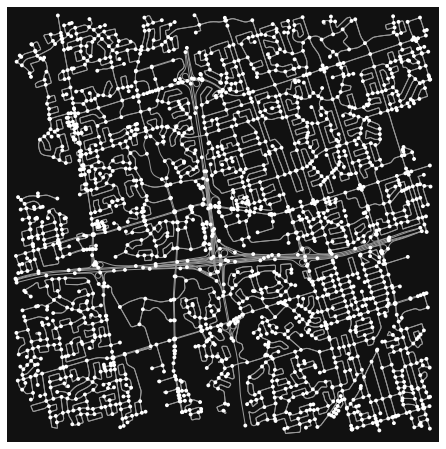

In [3]:
north_toronto_chris_school = (43.7734184458907, -79.3368615141682)
G = ox.graph_from_point(north_toronto_chris_school, dist=3500, network_type='drive', clean_periphery=True, simplify=True)
fig, ax = ox.plot_graph(G)

In [69]:
'''#rint(cost(G,))
route=[2842081117,7092313993]
weight=0
for u, v in zip(route, route[1:]):
    print('wow')
    temp=ox.distance.shortest_path(G,u,v)
    for i in range(len(temp)-1):
        weight += G[temp[i]][temp[i+1]][0]['length'] '''


wow


In [5]:
pass1 = [267467317, 267467899, 424156512, 25768659, 1601907246, 267467891, 764519394, 267468571, 272604210, 208595695]
pass2 = [267467317, 259750245,265690165, 259750243, 1589941145, 265690065, 89541895, 303777370, 89546349,4088306218]
pass3 = [267467317, 266440152, 424052656, 249721645, 266439762, 262463537, 265868496, 262462785, 427974139, 427974005]
route_all=[pass1,pass2,pass3]

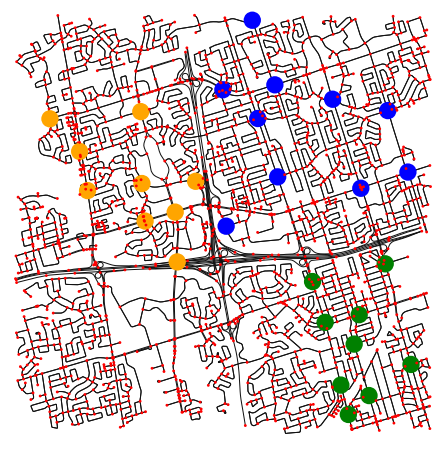

In [58]:
highlighted =pass1
nc=[]
for node in G.nodes():
    if node in pass1:
        nc.append('b')
    elif node in pass2:
        nc.append('#ffa500')
    elif node in pass3:
        nc.append('g')
    else:
        nc.append('r')

ns = [300 if node in pass1+pass2+pass3 else 8 for node in G.nodes()]
fig, ax = ox.plot_graph(G, node_size=ns, node_color=nc, node_zorder=2,bgcolor='w',edge_color='#111111')

In [8]:
%%capture
source(random_tour)
source(PMX_crossover)
source(ERO_crossover)
source(ordOne_crossover)
source(insert_mutation)
source(swap_mutation)
crossover = ordOne_crossover
mutate = insert_mutation
swap_mutate=swap_mutation

In [20]:
size_of_population = 10
ngen = 100
best_at_gen = [] 
result = [[] for _ in range(5)]
time_spend=[[] for _ in range(5)]

In [22]:
for i in range(3):
    for j in range(5):
        ngen=100*(j+1)
        start_time=time.time()
        pool = [*random_tour(route_all[i], number_of_perms=size_of_population)]
        result[i].append(GA_route(G,pool,ngen))
        time_spend[i].append(time.time()-start_time)

100%|██████████| 500/500 [03:12<00:00,  2.60it/s]


In [30]:
print(result[0][1]==result[0][2])

True


In [37]:
def GA_route(G, pool, ngen):
    best_at_gen=[]
    for generation in tqdm(range(ngen)):
        # 1- crossover every consecutive pair of routes
        # 2- replace the weakest of the two parent with the product of the crossover
        # 3- mutate the whole pool
        # 4- repeat and save the value best tour in that generation

        # 1-
        for parent1, parent2 in zip(pool, pool[1:]):
            child = crossover(parent1, parent2)

            # 2-
            if cost(G, parent1) > cost(G, parent2):
                pool[pool.index(parent2)] = child
            else:
                pool[pool.index(parent1)] = child

        # 3-
        for i in range(size_of_population):
            pool[i] = mutate(pool[i])

        for i in range(size_of_population):
            pool[i] = swap_mutate(pool[i])
        # 4-
        best_at_gen.append(cost(G, min(pool, key = lambda tour : cost(G, tour))))
    return best_at_gen

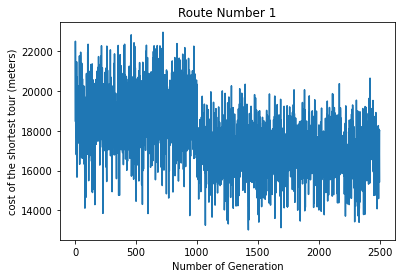

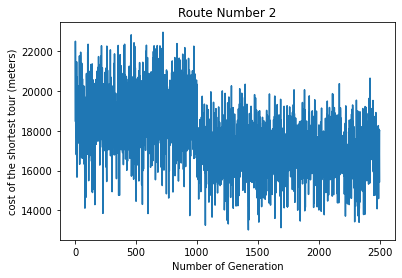

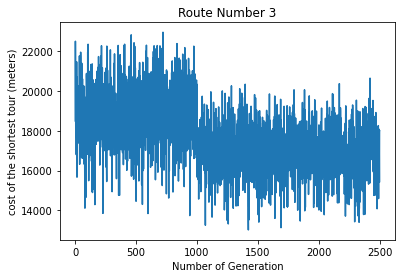

In [31]:
for i in range(3):
    plt.figure()
    plt.xlabel("Number of Generation")
    plt.ylabel("cost of the shortest tour (meters)")
    plt.title("Route Number 000"+str(i+1))
    plt.plot(result[i][0][2:4500])
    plt.show()

Text(0.5, 1.0, 'Number of Generation vs Total Time (s)')

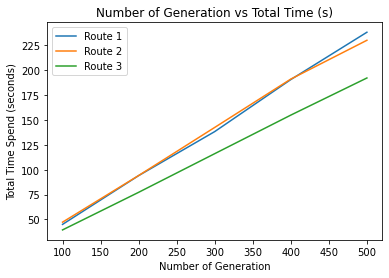

In [43]:
plt.figure()
plt.xlabel("Number of Generation")
plt.ylabel("Total Time Spend (seconds)")
x=[100,200,300,400,500]
label=[]
for i in range(3):
    plt.plot(x,time_spend[i])
    label.append('Route '+str(i+1))
plt.legend(label)
plt.title('Number of Generation vs Total Time (s)')

100%|██████████| 500/500 [04:06<00:00,  2.03it/s]


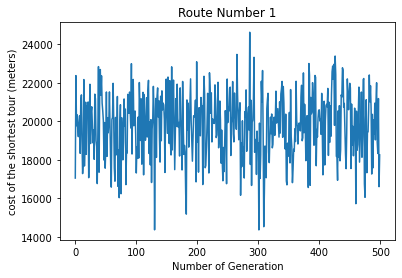

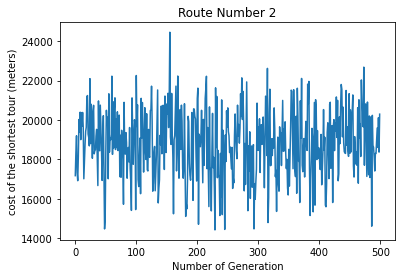

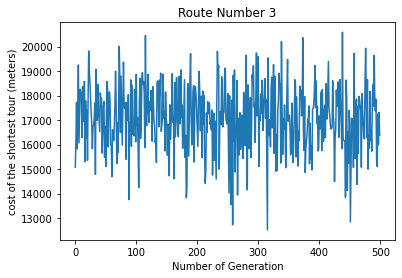

In [39]:
ngen=500

for i in range(3):
    final_result=[]
    pool = [*random_tour(route_all[i], number_of_perms=size_of_population)]
    final_result=(GA_route(G,pool,ngen))
    plt.figure()
    plt.xlabel("Number of Generation")
    plt.ylabel("cost of the shortest tour (meters)")
    plt.title("Route Number "+str(i+1))
    plt.plot(final_result)


In [55]:
for i in range(3):
    length = []
    for j in range(9):
        a = 0
        a+=cost(G,ox.distance.shortest_path(G,route_all[0][0],route_all[i][j+1]))
    print(a)

5024.588000000001
4589.471
4637.080999999999


In [54]:
print(length)

[4637.080999999999]
